In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\Data Science\Projects\CodSoft Internship\Data\Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###  Data  Cleaning

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

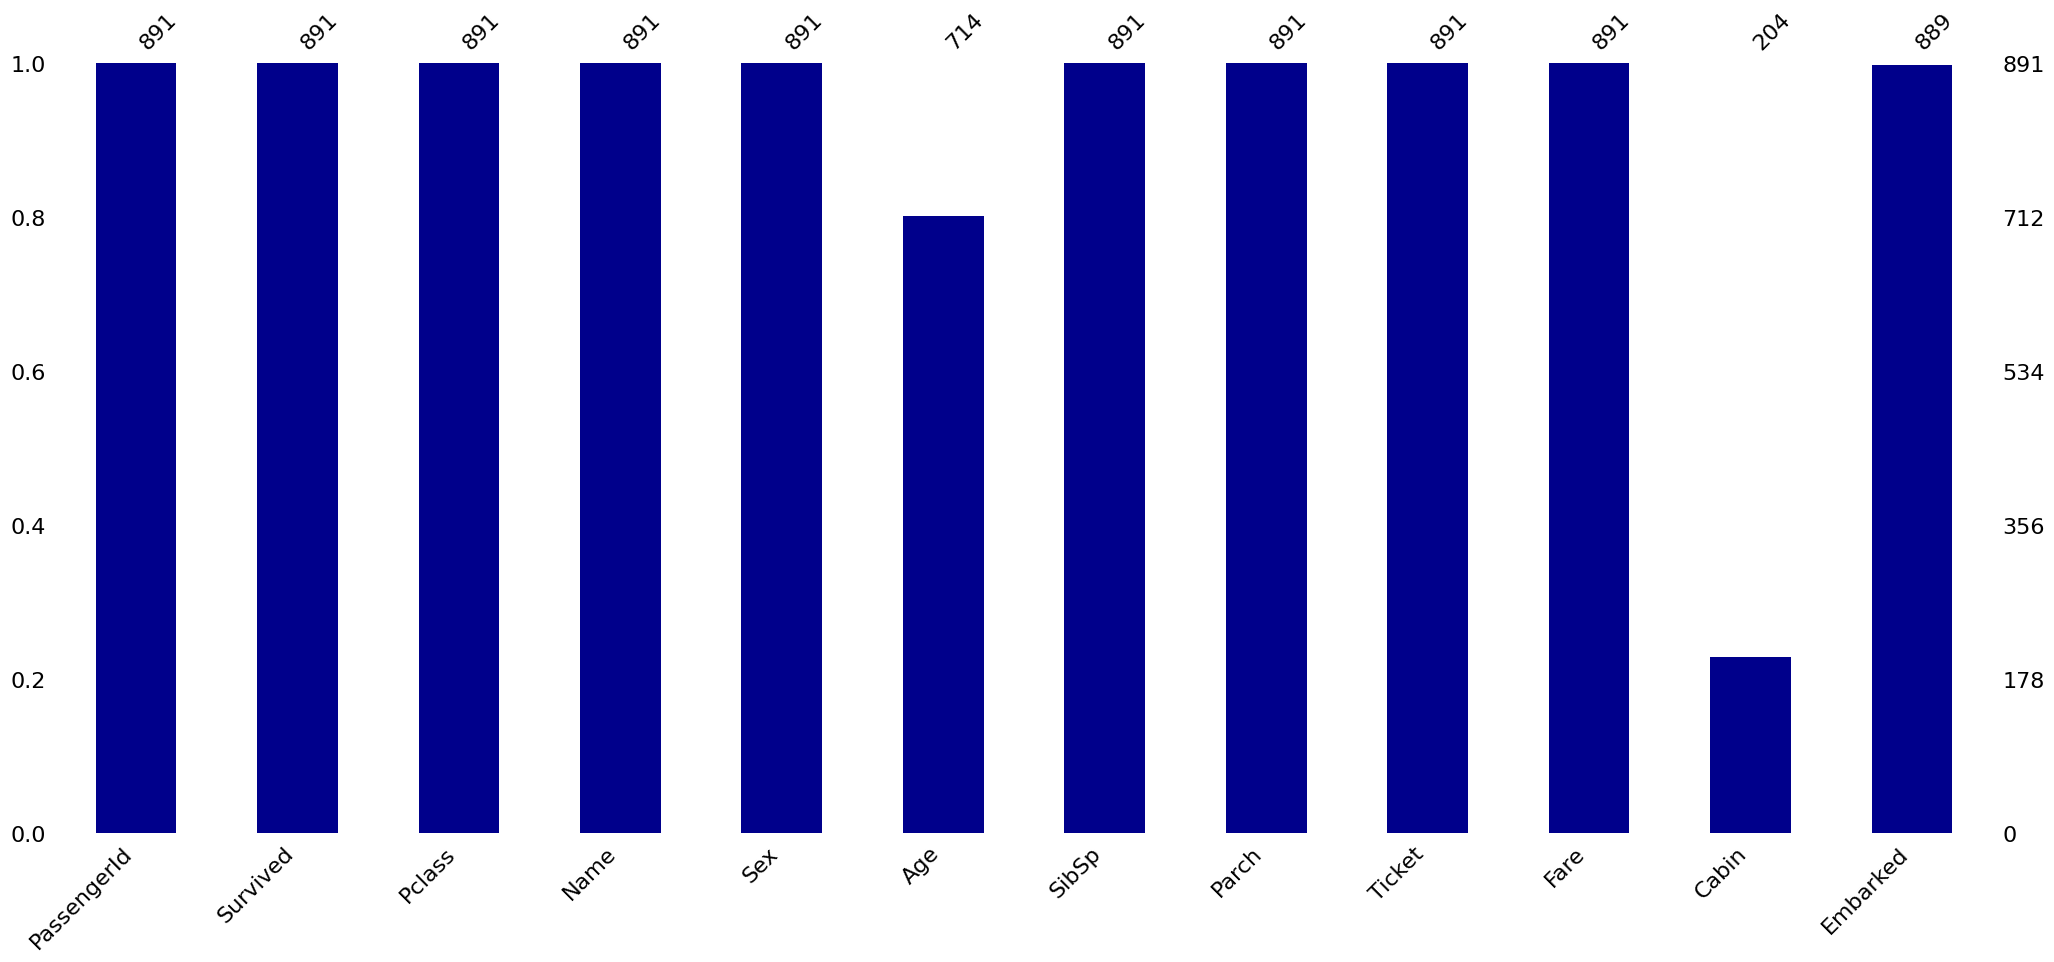

In [7]:
msno.bar(df,color="darkblue")
plt.show()

In [8]:
df.drop('Cabin',axis = 1,inplace = True)

#### filling the missing Values

In [9]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
print("Median of Age",df['Age'].median())
print("Mean Of Age",df['Age'].mean())

Median of Age 28.0
Mean Of Age 29.69911764705882


In [11]:
df['Age'].fillna(df['Age'].median(),inplace=True)

###### There are some false Value such as 0.42,0.67 we need to remove that

In [12]:
age_below_1 = (df['Age'] < 1).sum()
print("Number of values of age below 1:", age_below_1)

Number of values of age below 1: 7


In [13]:
df = df[df['Age'] >= 1]
# We had removed the values which are smaller then one

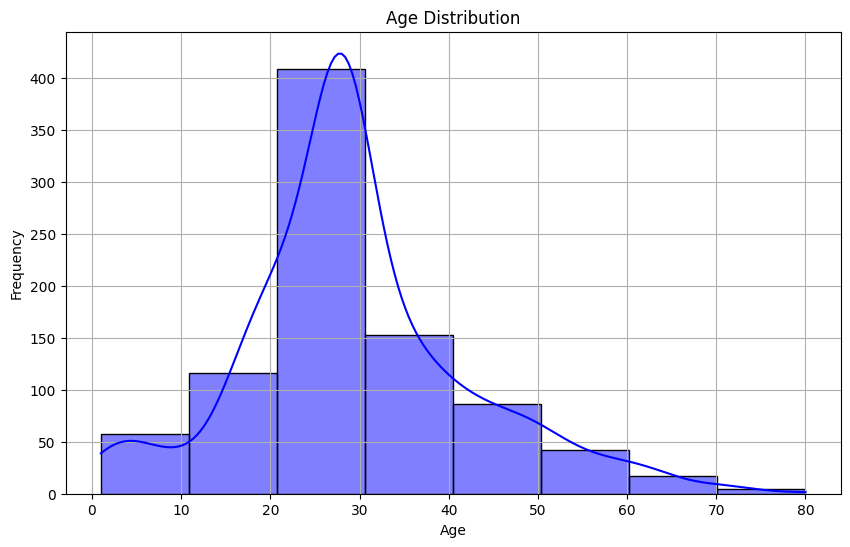

In [14]:

plt.figure(figsize=(10,6))

sns.histplot(df["Age"], bins=8, kde=True, color='blue', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)

plt.show()


##### Here We Can See the Maximum Age Frequency ranges from 20 to 30  

In [15]:
df['Embarked'].isnull().sum()

2

In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  884 non-null    int64  
 1   Survived     884 non-null    int64  
 2   Pclass       884 non-null    int64  
 3   Name         884 non-null    object 
 4   Sex          884 non-null    object 
 5   Age          884 non-null    float64
 6   SibSp        884 non-null    int64  
 7   Parch        884 non-null    int64  
 8   Ticket       884 non-null    object 
 9   Fare         884 non-null    float64
 10  Embarked     884 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 82.9+ KB


##### 'PassengerId','Name','Ticket' has so many unique value which is not useful for  the prediction so we drop them

In [19]:
df.drop(['PassengerId','Name','Ticket'],axis = 1,inplace= True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
df['Sex'].value_counts()

male      572
female    312
Name: Sex, dtype: int64

In [22]:
df['Embarked'].value_counts()

S    642
C    165
Q     77
Name: Embarked, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Encoded_sex']=label_encoder.fit_transform(df["Sex"])
df['Encoded_Embarked'] = label_encoder.fit_transform(df['Embarked'])
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Encoded_sex,Encoded_Embarked
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0


In [24]:
df.drop(['Sex','Embarked'], axis=1, inplace=True)


In [25]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Encoded_sex,Encoded_Embarked
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


### Date Preprocessing

In [26]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(df[['Age','Fare']])

MinMaxScaler()

In [27]:
Normalized_Data = minmax.transform(df[['Age','Fare']])
Normalized_Data

array([[0.26582278, 0.01415106],
       [0.46835443, 0.13913574],
       [0.3164557 , 0.01546857],
       ...,
       [0.34177215, 0.04577135],
       [0.3164557 , 0.0585561 ],
       [0.39240506, 0.01512699]])

In [28]:
df['Normalized_age'] = Normalized_Data [:,0]
df['Normalized_fare'] = Normalized_Data [:,1]

## droping the Original Column
df.drop(['Age','Fare'],axis=1,inplace=True)

In [29]:
df.head()

,Survived,Pclass,SibSp,Parch,Encoded_sex,Encoded_Embarked,Normalized_age,Normalized_fare
0,0,3,1,0,1,2,0.265823,0.014151
1,1,1,1,0,0,0,0.468354,0.139136
2,1,3,0,0,0,2,0.316456,0.015469
3,1,1,1,0,0,2,0.430380,0.103644
4,0,3,0,0,1,2,0.430380,0.015713


In [30]:
df.shape

(884, 8)

### Feature and Target Set

In [31]:
X = df.drop('Survived',axis = 1)
X.head(2)

,Pclass,SibSp,Parch,Encoded_sex,Encoded_Embarked,Normalized_age,Normalized_fare
0,3,1,0,1,2,0.265823,0.014151
1,1,1,0,0,0,0.468354,0.139136


In [32]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=8)
print("X_train Shape",X_train.shape)
print("X_test SHape",X_test.shape)
print("y_train test",y_train.shape)
print("y_test Shape",y_test.shape)

X_train Shape (707, 7)
X_test SHape (177, 7)
y_train test (707,)
y_test Shape (177,)


## Model Building
### 1. kNN 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {
    "n_neighbors" : np.arange(1,21),
    "weights": ['uniform','distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 20, 30, 40, 50],  
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Search for the best distance metric
}

In [37]:
grid_search = GridSearchCV(estimator=knn,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'weights': ['uniform', 'distance']})

In [38]:
best_knn = grid_search.best_estimator_
best_knn

KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=16)

In [39]:
y_pred_knn = best_knn.predict(X_test)


In [40]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test,y_pred_knn)
print("Accuracy on test set For Knn Model:", knn_accuracy)

Accuracy on test set For Knn Model: 0.8022598870056498


##### Confusion Metrics

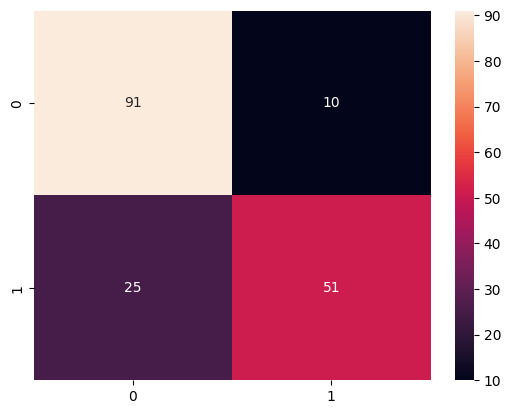

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot= True)
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       101
           1       0.84      0.67      0.74        76

    accuracy                           0.80       177
   macro avg       0.81      0.79      0.79       177
weighted avg       0.81      0.80      0.80       177



## 2. Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)


DecisionTreeClassifier()

#### HyperParameter Tuning Using RandomSearchCv

In [44]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "criterion":['gini', "entropy", "log_loss"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    "min_samples_split":[1,2,3,4,5,6,8,9,10,11,12,13,15,20,24],
    "min_samples_leaf":[1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

In [45]:
random_search = RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid,n_iter=500,cv=5)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'min_samples_leaf': [1, 2, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              8, 9, 10, 11, 12,
                                                              13, 15, 20, 24]})

In [46]:
print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'min_samples_split': 9, 'min_samples_leaf': 6, 'max_depth': 7, 'criterion': 'gini'}


In [47]:
best_decision_tree = random_search.best_estimator_

In [48]:
y_pred_decision = best_decision_tree.predict(X_test)
y_pred_decision

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1], dtype=int64)

In [49]:
decision_tree_accuracy = accuracy_score(y_test,y_pred_decision)
decision_tree_accuracy

0.8192090395480226

##### Confusion Metrics

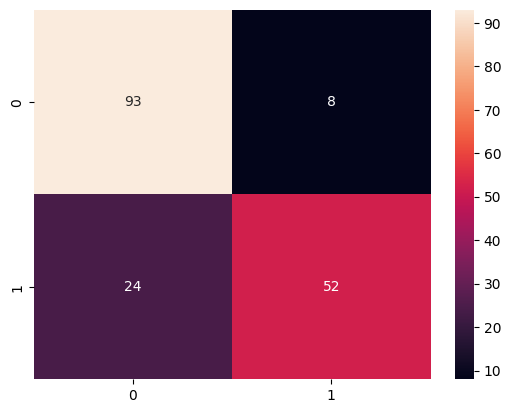

In [50]:
cm = confusion_matrix(y_test,y_pred_decision)
sns.heatmap(cm,annot= True)
plt.show()

In [51]:
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       101
           1       0.87      0.68      0.76        76

    accuracy                           0.82       177
   macro avg       0.83      0.80      0.81       177
weighted avg       0.83      0.82      0.82       177



## 3.Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [53]:
param_grid = {
    "n_estimators":[30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "min_samples_split":[1,3,4,5,6,8,9,10,11,12,13,15,20,21,24],
    "min_samples_leaf":[1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "max_features":['sqrt','auto','log2']
}

In [54]:
random_search_f = RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid,n_iter=100,cv=5)

In [55]:
random_search_f.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20, 21],
                                        'min_samples_split': [1, 3, 4, 5, 6, 8,
                                                              9, 10, 11, 12, 13,
                                                              15, 20, 21, 24],
                                        'n_estimators': [30, 35, 40, 45, 50, 55,
                                                         60, 65, 70, 75, 80, 85,
                                                         90, 95, 100, 200]})

In [56]:
print("Best hyperparameters:", random_search_f.best_params_)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 19}


In [57]:
best_random_forest=random_search_f.best_estimator_
y_pred_random = best_random_forest.predict(X_test)

In [58]:
random_forest_accuracy = accuracy_score(y_test,y_pred_random)
random_forest_accuracy

0.7909604519774012

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

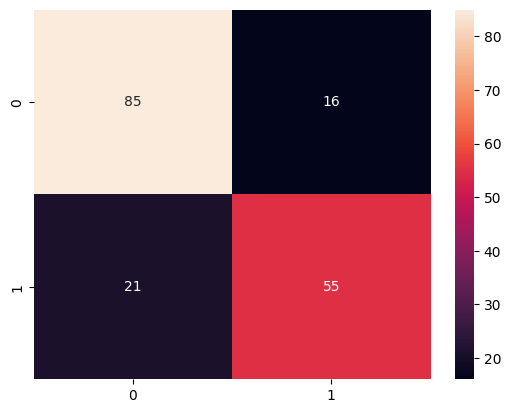

In [59]:
cm = confusion_matrix (y_test,y_pred_random)
sns.heatmap(cm,annot=True)
plt.plot

In [60]:
print(classification_report(y_test,y_pred_decision))


              precision    recall  f1-score   support

           0       0.79      0.92      0.85       101
           1       0.87      0.68      0.76        76

    accuracy                           0.82       177
   macro avg       0.83      0.80      0.81       177
weighted avg       0.83      0.82      0.82       177



### Support Vector Machine

In [33]:
from sklearn.svm import SVC
svm = SVC(kernel="poly",C=90)

In [36]:
svm.fit(X_train,y_train)


SVC(C=90, kernel='poly')

In [40]:
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test,svm_pred)
svm_accuracy

0.8022598870056498

#### HyperParameter Tuning Using The RandomsearchCv

In [46]:
from scipy.stats import randint,uniform
param_grid = {'C': [0.1, 1,10,20,30,40,50,60,70,80,90,100],  
              'gamma': [1, 0.1, 0.01,0.001,0.0001], 
              'kernel': ['rbf','poly']}                                        

In [47]:
from sklearn.model_selection import RandomizedSearchCV
random_search_svm = RandomizedSearchCV(estimator=svm,param_distributions=param_grid,n_iter=10,cv=5)

In [ ]:
random_search_svm.fit(X_train,y_train)

In [43]:
random_search_svm.best_estimator_

SVC(C=1, gamma=0.1)

In [44]:
best_svm = random_search_svm.best_estimator_
best_svm_pred = best_svm.predict(X_test)
best_svm_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
best_svm_accuracy = accuracy_score(y_test,best_svm_pred)
best_svm_accuracy

0.7796610169491526